# CIND820: Big Data Analytics Project
## Predictive Analysis Techniques to Identify Risk Factors Associated with Obesity

###  Final Results

To conduct predictive analysis in this study, I employed the following steps:

Step 1: Import libraries 

I imported the necessary required libraries such as Pandas, Numpy, Matplotlib, Scikit-learn, and any other necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

#installing dependencies
!pip install xgboost
!pip install --upgrade scikit-learn
!pip install matplotlib


# Creating a instance of label Encoder.
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

Step 2: Preprocessing: 


I loaded the data into Jupyter Notebook using the Pandas library, preprocessed including cleaning the data, handling missing values, transforming variables, and normalization. The details are mentioned below:

1. Load the data

In [4]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#View the data
df.head()

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

2. Check if there are any missing values

In [5]:
df.shape
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

<AxesSubplot:>

The shape function and heatmapp informed that the data does not have any missing value.

3. Check the duplicate rows

In [6]:
dup_df = df[df.duplicated()]
print(dup_df.shape)

(24, 17)


This shows there are 24 rows of duplicate data. Hence this needs to be removed.

In [7]:
# Remove duplicates 
data = df.drop_duplicates()

4. Check categorical variables

In [8]:
# Checking unique values of categorical variables
cat_col = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for cat in cat_col:
    print(cat)
    print(data[cat].unique())
    print("\n")

Gender
['Female' 'Male']


family_history
['yes' 'no']


FAVC
['no' 'yes']


CAEC
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE
['no' 'yes']


SCC
['no' 'yes']


CALC
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




In [9]:
# Convert categorical data into numerical data. 

le_Gender = LabelEncoder()
le_family_history = LabelEncoder()
le_FAVC = LabelEncoder()
le_CAEC = LabelEncoder()
le_SMOKE = LabelEncoder()
le_SCC = LabelEncoder()
le_CALC = LabelEncoder()
le_MTRANS = LabelEncoder()
le_NObeyesdad = LabelEncoder()

In [10]:
# Add new columns into df dataframe by using fit and trnansform method.

df['Gender_n'] = le_Gender.fit_transform(df['Gender'])
df['family_history_n'] = le_Gender.fit_transform(df['family_history'])
df['FAVC_n'] = le_Gender.fit_transform(df['FAVC'])
df['CAEC_n'] = le_Gender.fit_transform(df['CAEC'])
df['SMOKE_n'] = le_Gender.fit_transform(df['SMOKE'])
df['SCC_n'] = le_Gender.fit_transform(df['SCC'])
df['CALC_n'] = le_Gender.fit_transform(df['CALC'])
df['MTRANS_n'] = le_Gender.fit_transform(df['MTRANS'])
df['NObeyesdad_n'] = le_Gender.fit_transform(df['NObeyesdad'])
df.head()

# It will give additional columns with numerical values. 

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  ...           NObeyesdad Gender_n  family_history_n  FAVC_n CAEC_n  \
0    no  ...        Normal_Weight        0                 1       0      2   
1   yes  ...        Normal_Weight        0                 1       0      2   
2    no  ...        Normal_Weight        1                 1       0      2   
3    no  ...   Overweight_Level_I        1                 0       0      2   
4    no  ...  Overweight_Level_II        1                 0       0      2   

  SMOKE_n SCC_n  CALC_n  MTRANS_n  NObeyesdad_n  
0       0     0       3         3             1  
1       1     1       2         3             1  
2       0     0       1         3             1  
3       0     0       1         4             5  
4       0     0       2         3             6  

[5 rows x 26 columns]

In [11]:
# Create new dataframe by drop columns with text and keep numerical data 


In [12]:
df_n = df.drop(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'], axis='columns')
df_n

Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE  Gender_n  family_history_n  FAVC_n  CAEC_n  SMOKE_n  SCC_n  \
0     1.000000         0                 1       0       2        0      0   
1     0.000000         0                 1       0       2        1      1   
2     1.000000         1                 1       0       2        0      0   
3     0.000000         1                 0       0       2        0      0   
4     0.000000         1                 0       0       2        0      0   
...        ...       ...               ...     ...     ...      ...    ...   
2106  0.906247         0                 1       1       2        0      0   
2107  0.599270         0                 1       1       2        0      0   
2108  0.646288         0                 1       1       2        0      0   
2109  0.586035         0                 1       1       2        0      0   
2110  0.714137         0                 1       1       2        0      0   

      CALC_n  MTRANS_n  NObeyesdad_n  
0          3         3             1  
1          2         3             1  
2          1         3             1  
3          1         4             5  
4          2         3             6  
...      ...       ...           ...  
2106       2         3             4  
2107       2         3             4  
2108       2         3             4  
2109       2         3             4  
2110       2         3             4  

[2111 rows x 17 columns]

In [13]:
# The target column NObeyesdad is created by calculating the Body Mass Index (BMI) for each individual. 
# BMI is a measure of body fat based on an individual's weight and height. 
# The formula for calculating BMI is weight in kilograms divided by the square of height in meters (BMI=kg/m²). 

# The results were compared with the data provided by WHO and the Mexican Normativity .
# Underweight Less than 18.5
# Normal 18.5 to 24.9
# Overweight 25.0 to 29.9
# Obesity I 30.0 to 34.9
# Obesity II 35.0 to 39.9
# Obesity III Higher than 40 

# Since both weight and height have been used to calculate BMI, therefore, we will drop Weight and Height column
# to avoid duplication in the data. 

In [14]:
df_new = df_n.drop(['Weight', 'Height'], axis='columns')

5. Get the overview of the dataset and describe it.

In [15]:
#Return columns
print(df_new.keys(), "\n")

#Return array dimensions
print(df_new.shape, "\n")

#Dataframe summary
df_new.info()

#Summarize  central tendency, dispersion, and shape of a dataset’s distribution
df_new.describe()

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_n',
       'family_history_n', 'FAVC_n', 'CAEC_n', 'SMOKE_n', 'SCC_n', 'CALC_n',
       'MTRANS_n', 'NObeyesdad_n'],
      dtype='object') 

(2111, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2111 non-null   float64
 1   FCVC              2111 non-null   float64
 2   NCP               2111 non-null   float64
 3   CH2O              2111 non-null   float64
 4   FAF               2111 non-null   float64
 5   TUE               2111 non-null   float64
 6   Gender_n          2111 non-null   int32  
 7   family_history_n  2111 non-null   int32  
 8   FAVC_n            2111 non-null   int32  
 9   CAEC_n            2111 non-null   int32  
 10  SMOKE_n           2111 non-null   int32  
 11  SCC_n             2111 non-null   int32  
 12  CALC_n           

Age         FCVC          NCP         CH2O          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     2.419043     2.685628     2.008011     1.010298   
std       6.345968     0.533927     0.778039     0.612953     0.850592   
min      14.000000     1.000000     1.000000     1.000000     0.000000   
25%      19.947192     2.000000     2.658738     1.584812     0.124505   
50%      22.777890     2.385502     3.000000     2.000000     1.000000   
75%      26.000000     3.000000     3.000000     2.477420     1.666678   
max      61.000000     3.000000     4.000000     3.000000     3.000000   

               TUE     Gender_n  family_history_n       FAVC_n       CAEC_n  \
count  2111.000000  2111.000000       2111.000000  2111.000000  2111.000000   
mean      0.657866     0.505921          0.817622     0.883941     1.859308   
std       0.608927     0.500083          0.386247     0.320371     0.468543   
min       0.000000     0.000000          0.000000     0.000000     0.000000   
25%       0.000000     0.000000          1.000000     1.000000     2.000000   
50%       0.625350     1.000000          1.000000     1.000000     2.000000   
75%       1.000000     1.000000          1.000000     1.000000     2.000000   
max       2.000000     1.000000          1.000000     1.000000     3.000000   

           SMOKE_n        SCC_n       CALC_n     MTRANS_n  NObeyesdad_n  
count  2111.000000  2111.000000  2111.000000  2111.000000   2111.000000  
mean      0.020843     0.045476     2.268593     2.365230      3.015632  
std       0.142893     0.208395     0.515498     1.261423      1.952090  
min       0.000000     0.000000     0.000000     0.000000      0.000000  
25%       0.000000     0.000000     2.000000     3.000000      1.000000  
50%       0.000000     0.000000     2.000000     3.000000      3.000000  
75%       0.000000     0.000000     3.000000     3.000000      5.000000  
max       1.000000     1.000000     3.000000     4.000000      6.000000

6. Split the data into independent and target sets.

In [16]:
#Store the feature and target variable 
X = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

# X represents all the features in df_n, except for the last column (independent variables) 
# y represents only the last column of df_n, which is the target variable.

print(df_new.shape)
print(X.shape)
print(y.shape)

(2111, 15)
(2111, 14)
(2111,)


7. Select the best features using LASSO

In our data, we have 14 features and only a subset of them are actually important for predicting the outcome.
Lasso (Least Absolute Shrinkage and Selection Operator) model which is a linear regression method is used to identify the most important features for predicting the outcome, and discard the rest. It can also be useful for reducing overfitting in a model by removing unnecessary features and achieve better performance.

In [17]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit a Lasso model to the data and select the most important features
lasso = Lasso(alpha=0.1)
lasso.fit(X_std, y)

# Get the indices of the selected features
selected_feature_indices = lasso.coef_.nonzero()[0]

# Get the names of the selected features
n_selected_features = (lasso.coef_ != 0).sum()
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Number of selected features:", n_selected_features)
print("Selected feature indices:", lasso.coef_.nonzero()[0])
print("Selected feature names:", selected_feature_names)

Number of selected features: 8
Selected feature indices: [ 0  2  3  4  7  9 12 13]
Selected feature names: Index(['Age', 'NCP', 'CH2O', 'FAF', 'family_history_n', 'CAEC_n', 'CALC_n',
       'MTRANS_n'],
      dtype='object')


8. Create subset of data set based on the selected features:

In [18]:
New_X = X.loc[:,['Age', 'NCP', 'CH2O', 'FAF', 'family_history_n', 'CAEC_n', 'CALC_n','MTRANS_n']]
New_X.head(10)
New_X.shape
print(New_X.head)

<bound method NDFrame.head of             Age  NCP      CH2O       FAF  family_history_n  CAEC_n  CALC_n  \
0     21.000000  3.0  2.000000  0.000000                 1       2       3   
1     21.000000  3.0  3.000000  3.000000                 1       2       2   
2     23.000000  3.0  2.000000  2.000000                 1       2       1   
3     27.000000  3.0  2.000000  2.000000                 0       2       1   
4     22.000000  1.0  2.000000  0.000000                 0       2       2   
...         ...  ...       ...       ...               ...     ...     ...   
2106  20.976842  3.0  1.728139  1.676269                 1       2       2   
2107  21.982942  3.0  2.005130  1.341390                 1       2       2   
2108  22.524036  3.0  2.054193  1.414209                 1       2       2   
2109  24.361936  3.0  2.852339  1.139107                 1       2       2   
2110  23.664709  3.0  2.863513  1.026452                 1       2       2   

      MTRANS_n  
0            3  

9. Partition the data into training and test sets (70/30)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(New_X,y,test_size=0.30,random_state=42)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (1477, 8)
X Test: (634, 8)
Y Train: (1477,)
Y Test: (634,)


# Select the appropriate predictive model

I selected the following models:

    1. Random Forest 
    2. Extreme Gradient Boostin(XGBoost)
    3. K Nearest Neighbout (KNN)
   

I used the training data to train the selected model. This also involved fitting the model to the training data.
Then I used the test data to evaluate the performance of the model. 
This includes measuring the model's accuracy with cross-validation to evaluate the performance of a model as it helps to :
1. reduce the variance in the estimate of the model's performance by using multiple test sets, 
2. provide a more reliable estimate of the model's performance because it uses all the available data for training and testing
3. help to identify any problems with the model by comparing the performance on the training and test sets and 
4. improve the reliability and generalizability of the model.

I then plottd confusion matrix to see the distribution of errors. This is followed by generating 'classficiation report' which also calcualted precision, recall and F1 score for all classes. 
Towards the end, I performed feature importances as it helps to identify the most important features or variables that contribute the most to the performance of a machine learning model.

The findings are given below:

### 1: Random Forest

In [20]:
import time
import pickle

In [21]:
# Import library 
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=42)

# n_estimators=50, which means I used 50 decision trees in our Random Forest.
# The accuracy from 30 to 50 n_estimators was increasing but then decreased at 60, 
#so I got the base score with n_estimator 50

# max_depth = 10 which limits the depth of each decision tree to a maximum of 10 levels.
# min_samples_split = 2, which means that a node will only be split if it contains at least 2 samples.
# min_samples_leaf = 1, which means that each leaf node must contain at least 1 sample.
# max_features = 'auto', which means that the algorithm will consider all features when looking for the best split.
# random_state = 42 which ensures that the results are reproducible.

# Start training time measurement
start_time = time.time()

# Train the model on the training data
model_rf.fit(X_train, y_train)

# End training time measurement
end_time = time.time()

# Calculate training time
training_time_rf = end_time - start_time

# Start inference time measurement
start_time = time.time()

# Make predictions on the test data
y_pred = model_rf.predict(X_test)

# End inference time measurement
end_time = time.time()

# Calculate inference time
inference_time_rf = end_time - start_time

# Calculate model size in bytes
model_size_rf = pickle.dumps(model_rf).__sizeof__()

# Evaluate the performance of the model on the testing data
accuracy_rf = model_rf.score(X_test, y_test)

print("Accuracy:", accuracy_rf, "\n")
print("Training time: {:.2f} seconds".format(training_time_rf))
print("Inference time: {:.2f} seconds".format(inference_time_rf))
print("Model size: {:.2f} bytes".format(model_size_rf))

Accuracy: 0.7208201892744479 

Training time: 0.16 seconds
Inference time: 0.01 seconds
Model size: 2306922.00 bytes


In [22]:
# Perform cross Validation 
start_time = time.time()

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
rf_cv = cross_val_score(model_rf, New_X, y, scoring='accuracy', cv=kfold)
rf_cv

end_time = time.time()

# Calculate processing time
processing_time_rf = end_time - start_time

# Print the cross-validation scores, mean and standard deviation of scores, and processing time
print("Cross-validation scores:", rf_cv, "\n")
print("Mean:", np.mean(rf_cv), "\n")
print("Standard Deviation:", np.std(rf_cv), "\n")
print("Processing time: {:.2f} seconds".format(processing_time_rf))

Cross-validation scores: [0.74528302 0.72511848 0.69194313 0.74407583 0.78199052 0.75829384
 0.7535545  0.72985782 0.77725118 0.82464455] 

Mean: 0.753201287668783 

Standard Deviation: 0.03430672317162391 

Processing time: 2.11 seconds


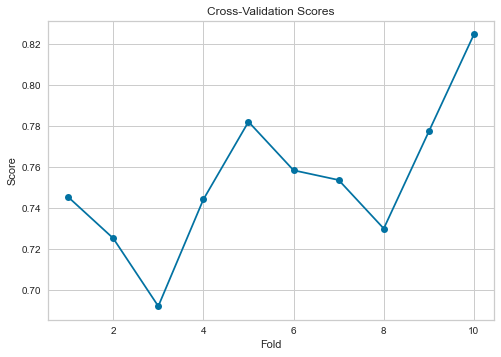

In [23]:
# Plot a line chart of the cross-validation scores for each fold
fig, ax = plt.subplots()
ax.plot(range(1,11), rf_cv, '-o')
ax.set_xlabel('Fold')
ax.set_ylabel('Score')
ax.set_title('Cross-Validation Scores')
plt.show()

[[72  6  0  0  1  7  0]
 [12 59 12  0  0  5  5]
 [ 2  7 73  5 10  2  3]
 [ 0  2  2 79  1  0  4]
 [ 0  1  0  0 97  0  0]
 [ 2 18  5  7 13 41  2]
 [ 1  6 23  4  3  6 36]]


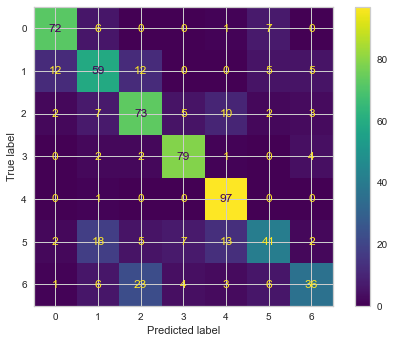

In [24]:
# Plot confusion matrix to see the distribution of errors. 
# For that I need x predicted; so here I can use model.predict on X_test data set to get y_predicted.

# Make predictions on the testing data
y_pred = model_rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Selected model performances interpretations:

Model Performance on the first class. 
The model predicted 72 instances as belonging to the first class, out of which:
6 were misclassified as the second class, 
1 was misclassified as the fifth class, and 7 were misclassified as the sixth class. 
There were no misclassifications with respect to the other classes.

Model Performance on the fourth class. 
The model predicted 79 instances as belonging to the fourth class, out of which 
2 were misclassified as the second class, 2 were misclassified as the third class, 
1 was misclassified as the fifth class, and 4 were misclassified as the seventh class.

Model Performance on the fifth class.
The model predicted 97 instances as belonging to the fifth class, out of which
1 was misclassified as the second class.

In [25]:
from sklearn.metrics import classification_report

classification_report(y_pred, y_test)
rf_report = (classification_report(y_pred, y_test))
print(rf_report)


              precision    recall  f1-score   support

           0       0.84      0.81      0.82        89
           1       0.63      0.60      0.61        99
           2       0.72      0.63      0.67       115
           3       0.90      0.83      0.86        95
           4       0.99      0.78      0.87       125
           5       0.47      0.67      0.55        61
           6       0.46      0.72      0.56        50

    accuracy                           0.72       634
   macro avg       0.71      0.72      0.71       634
weighted avg       0.76      0.72      0.73       634



The model was trained to classify instances into one of seven categories (0-6), and this report shows the performance of the model on a test set of 634 instances.

Accuracy: 72% of instances in the test set were correctly classified by the model.

Precision: On average, 76% of instances classified as positive by the model are truly positive.

Recall:  On average, the model correctly identified 72% of true positives.

F1-score: The weighted average F1-score across all classes is 0.73, a metric that combines precision and recall into a single score that balances both metrics. 

In [80]:
# Get feature importances
importances = model_rf.feature_importances_

# Create DataFrame of feature importances
importances = pd.DataFrame({'feature': New_X.columns, 'importance': model_rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

importance
feature                     
Age                 0.264920
FAF                 0.159967
CH2O                0.156705
NCP                 0.148500
CALC_n              0.077264
CAEC_n              0.074574
family_history_n    0.060505
MTRANS_n            0.057565

In [83]:
# Plot feature importances
# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(importances.index, importances['importance'])

# Add axis labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores - Random Forest')

# Show the plot
plt.show()

According to the Random Forest model, the factors that influence the type of obesity in order of score are age, physical activity (FAF), water consumptions (CH2o), number of main meals (NCP), Consumption of Alcohol (CALC_n) and consumption of food between meals (CAEC_n)


###  2: XGBoost

In [28]:
# Import library 
from xgboost import XGBClassifier
import xgboost as xgb

# Initialize the XGBoost classifier
model_xgb = XGBClassifier()

params = {'booster': 'gbtree',
          'eta': 0.1,
          'max_depth': 5,
          'subsample': 0.8,
          'colsample_bytree': 0.8}

# booster type is gbtree to run (default).
# eta (learning rate) to 0.1 : It controls the step size shrinkage at each boosting iteration (default is 0.3).
# max_depth to 5; it is the maximum depth of the tree (default is 6); a lower value can help to reduce overfitting.
# subsample ratio of the training instances to 0.8 (default is 1)
# subsample ratio of columns when constructing each tree to 0.8 (default is 1)

# Start training time measurement
start_time = time.time()

# Train the model on the training data
model_xgb.fit(X_train, y_train)

# End training time measurement
end_time = time.time()

# Calculate training time
training_time_xg = end_time - start_time

# Start inference time measurement
start_time = time.time()

# Make predictions on the test data
y_pred = model_xgb.predict(X_test)

# End inference time measurement
end_time = time.time()

# Calculate inference time
inference_time_xg = end_time - start_time

# Calculate model size in bytes
model_size_xg = pickle.dumps(model_xgb).__sizeof__()

# Evaluate the performance of the model on the testing data
accuracy_xg = model_xgb.score(X_test, y_test)

print("Accuracy:", accuracy_xg, "\n")
print("Training time: {:.2f} seconds".format(training_time_xg))
print("Inference time: {:.2f} seconds".format(inference_time_xg))
print("Model size: {:.2f} bytes".format(model_size_xg))

Accuracy: 0.7539432176656151 

Training time: 0.91 seconds
Inference time: 0.01 seconds
Model size: 1326662.00 bytes


In [29]:
# Perform cross Validation 

start_time = time.time()
# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
xg_cv = cross_val_score(model_xgb, New_X, y, cv=kfold)
xg_cv

end_time = time.time()

# Calculate processing time
processing_time_xg = end_time - start_time

# Print the cross-validation scores, mean and standard deviation of scores, and processing time

print("Cross-validation scores:", xg_cv, "\n")
print("Mean:", np.mean(xg_cv), "\n")
print("Standard Deviation:", np.std(xg_cv), "\n")
print("Processing time: {:.2f} seconds".format(processing_time_xg))

Cross-validation scores: [0.76886792 0.75829384 0.71563981 0.83886256 0.77725118 0.81042654
 0.78672986 0.78199052 0.79620853 0.83412322] 

Mean: 0.7868393990879012 

Standard Deviation: 0.03450936804800906 

Processing time: 10.40 seconds


In [30]:
# Plot a line chart of the cross-validation scores for each fold
fig, ax = plt.subplots()
ax.plot(range(1,11), xg_cv, '-o')
ax.set_xlabel('Fold')
ax.set_ylabel('Score')
ax.set_title('Cross-Validation Scores')
plt.show()

[[73  5  1  0  0  5  2]
 [ 8 65  9  0  0  4  7]
 [ 5  7 74  4  4  4  4]
 [ 0  2  3 74  1  1  7]
 [ 0  1  0  0 95  2  0]
 [ 1 17  7  4  3 53  3]
 [ 3  9 10  5  1  7 44]]


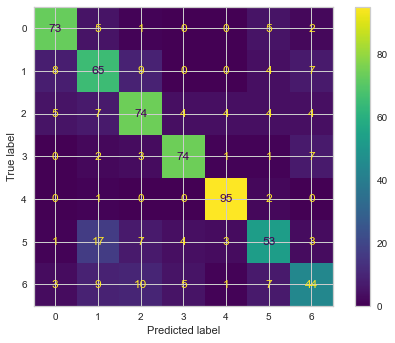

In [45]:
# Plot confusion matrix to see the distribution of errors. 
# Use model.predict on X_test data set to get y_predicted.

# Make predictions on the testing data
y_pred = model_xgb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Selected model performances interpretations:

The diagonal entries (73, 65, 74, 74, 95, 53, 44) represent the number of samples that were correctly classified.

The top-left cell (73) represents the number of samples that truly belong to class 0 and were correctly predicted as class 0.

The cell in the second row and third column (9) represents the number of samples that truly belong to class 2 but were misclassified as class 3.

The cell in the third row and second column (7) represents the number of samples that truly belong to class 1 but were misclassified as class 2.

The cell in the fifth row and sixth column (2) represents the number of samples that truly belong to class 4 but were misclassified as class 5.

In [46]:
# Compute classification report

classification_report(y_pred, y_test)
xg_report = (classification_report(y_pred, y_test))
print(xg_report)


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        90
           1       0.70      0.61      0.65       106
           2       0.73      0.71      0.72       104
           3       0.84      0.85      0.85        87
           4       0.97      0.91      0.94       104
           5       0.60      0.70      0.65        76
           6       0.56      0.66      0.60        67

    accuracy                           0.75       634
   macro avg       0.75      0.75      0.75       634
weighted avg       0.76      0.75      0.76       634



The model was trained to classify instances into one of seven categories (0-6), and this report shows the performance of the model on a test set of 634 instances.

Accuracy: 75% of instances in the test set were correctly classified by the model.

Precision: On average, 76% of instances classified as positive by the model are truly positive.

Recall: On average, the model correctly identified 75% of true positives.

F1-score: The weighted average F1-score across all classes is 76, a metric that combines precision and recall into a single score that balances both metrics.

In [85]:
# Get feature importances

importances = model_xgb.feature_importances_

# create DataFrame of feature importances
importances = pd.DataFrame({'feature': New_X.columns, 'importance': np.abs(importances)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances


importance
feature                     
family_history_n    0.200564
CAEC_n              0.160506
MTRANS_n            0.133065
CALC_n              0.118377
NCP                 0.117655
Age                 0.101675
FAF                 0.084916
CH2O                0.083243

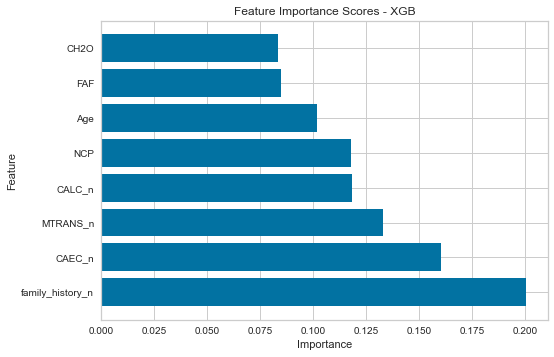

In [86]:
# Plot feature importances

# Create a horizontal bar chart
plt.barh(importances.index, importances['importance'])

# Add axis labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores - XGB')

# Show the plot
plt.show()

According to the XGBoost model, the factors that influence the type of obesity in order of score are family history, consumption of food between meals (CAEC_n), transportation used (MTRANS), consumption of alcohol (CALC_n), number of main meals (NCP), and age


### 3: K Nearest Neighbors (KNN)

In [49]:
# Import library 
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters
k = 5
distance_metric = 'euclidean'
weight_func = 'distance'

# Number of neighbors (K) = 5 (the number of nearest neighbors that will be considered to classify a new instance).
# Distance metric = Euclidean distance to measure the similarity between instances. 
# Weight function = distance-weighted function to assign weights to the neighbors; give more importance to the nearest neighbors.

# Initialize the KNN classifier
model_kn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, weights=weight_func)

# Start training time measurement
start_time = time.time()

# Train the model on the training data
model_kn.fit(X_train, y_train)

# End training time measurement
end_time = time.time()

# Calculate training time
training_time_kn = end_time - start_time

# Start inference time measurement
start_time = time.time()

# Make predictions on the test data
y_pred = model_kn.predict(X_test)

# End inference time measurement
end_time = time.time()

# Calculate inference time
inference_time_kn = end_time - start_time

# Calculate model size in bytes
model_size_kn = pickle.dumps(model_kn).__sizeof__()

# Evaluate the performance of the model on the testing data
accuracy_kn = model_kn.score(X_test, y_test)

print("Accuracy:", accuracy_kn, "\n")
print("Training time: {:.2f} seconds".format(training_time_kn))
print("Inference time: {:.2f} seconds".format(inference_time_kn))
print("Model size: {:.2f} bytes".format(model_size_kn))

Accuracy: 0.6798107255520505 

Training time: 0.01 seconds
Inference time: 0.01 seconds
Model size: 123695.00 bytes


In [50]:
# Set up KFold cross-validation

start_time = time.time()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
kn_cv = cross_val_score(model_kn, X_train, y_train, cv=kfold)
kn_cv

end_time = time.time()

# Calculate processing time
processing_time_kn = end_time - start_time

# Print the cross-validation scores, mean and standard deviation of scores, and processing time
print("Cross-validation scores:", kn_cv, "\n")
print("Mean:", np.mean(kn_cv), "\n")
print("Standard Deviation:", np.std(kn_cv), "\n")
print("Processing time: {:.2f} seconds".format(processing_time_kn))

Cross-validation scores: [0.71621622 0.72972973 0.71621622 0.7027027  0.67567568 0.63513514
 0.66216216 0.66666667 0.69387755 0.68707483] 

Mean: 0.6885456885456886 

Standard Deviation: 0.027661455481303353 

Processing time: 0.12 seconds


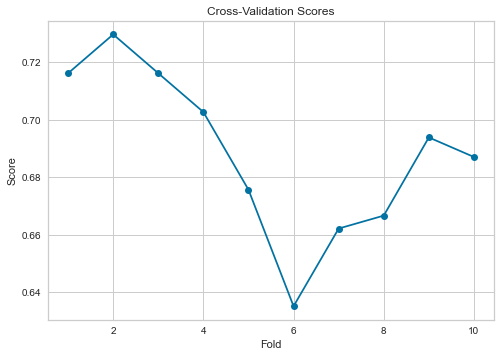

In [51]:
# Plot a line chart of the cross-validation scores for each fold
fig, ax = plt.subplots()
ax.plot(range(1,11), kn_cv, '-o')
ax.set_xlabel('Fold')
ax.set_ylabel('Score')
ax.set_title('Cross-Validation Scores')
plt.show()

[[70  8  0  1  1  3  3]
 [22 29 18  4  5  6  9]
 [ 5  3 75  4  4  5  6]
 [ 1  2  2 78  4  0  1]
 [ 0  1  1  1 91  4  0]
 [ 2  9  2 10  5 52  8]
 [ 3  7 14 11  5  3 36]]


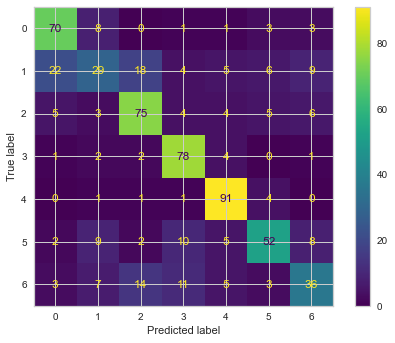

In [52]:
# Plot confusion matrix to see the distribution of errors. 
# Use model.predict on X_test data set to get y_predicted.

# Make predictions on the testing data
y_pred = model_kn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Selected model performances interpretations:

The diagonal entries (70, 29, 75, 78, 91, 52, 36) represent the number of samples that were correctly classified for each class.

The cell in the top-left corner (70) represents the number of samples that truly belong to class 0 and were predicted as class 0.

The cell in the second row and third column (18) represents the number of samples that truly belong to class 2 and were predicted as class 3.

The cell in the fourth row and fifth column (4) represents the number of samples that truly belong to class 3 and were predicted as class 4.


In [53]:
# Compute classification report

classification_report(y_pred, y_test)
kn_report = (classification_report(y_pred, y_test))
print(kn_report)

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       103
           1       0.31      0.49      0.38        59
           2       0.74      0.67      0.70       112
           3       0.89      0.72      0.79       109
           4       0.93      0.79      0.85       115
           5       0.59      0.71      0.65        73
           6       0.46      0.57      0.51        63

    accuracy                           0.68       634
   macro avg       0.67      0.66      0.66       634
weighted avg       0.73      0.68      0.70       634



The model was trained to classify instances into one of seven categories (0-6), and this report shows the performance of the model on a test set of 634 instances.

Accuracy: 68% of instances in the test set were correctly classified by the model.

Precision: On average, 73% of instances classified as positive by the model are truly positive.

Recall: On average, the model correctly identified 68% of true positives.

F1-score: The weighted average F1-score across all classes is 70, a metric that combines precision and recall into a single score that balances both metrics.

In [87]:
# Compute feature importances using permutation importance
from sklearn.inspection import permutation_importance

# get feature importances using permutation importance
importances = permutation_importance(model_kn, X_train, y_train)['importances_mean']

# create DataFrame of feature importances
importances = pd.DataFrame({'feature': New_X.columns, 'importance': np.abs(importances)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

importance
feature                     
Age                 0.685173
FAF                 0.369397
MTRANS_n            0.252810
NCP                 0.248070
CH2O                0.244144
CALC_n              0.192146
CAEC_n              0.110088
family_history_n    0.108192

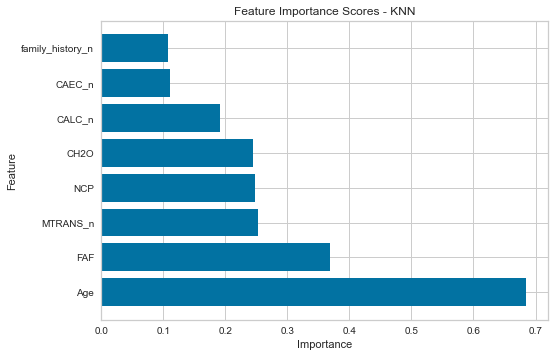

In [88]:
# Plot the sorted feature importances

plt.barh(importances.index, importances['importance'])

# Add axis labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title ('Feature Importance Scores - KNN')

# Show the plot
plt.show()

# The importance values represent the mean decrease in the model's score when a given feature is randomly shuffled.

According to the KNN model, the factors that influence the type of obesity in order of score are age, physical activity (FAF), 
number of main meals (NCP), consumption of water (CH2O), transportation used (MTRANS) and consumption of alcohol (CALC_n).


# Comparing the models

### 1 Efficiency:
I evaluated efficiency in terms of the time and computational resources required to train and deploy the model.

The following metrics are used to assess the efficiency of a model:

• Training time: The time required to train the model on a given dataset.

• Inference time: The time required to make predictions on new data.

• Model size: The memory and storage requirements of the model.


The records for all three models are given below: 

In [56]:
# print("Random_Forest", "Accuracy: {:.4f}".format(accuracy_rf), ("Precision: {:.4f}".format(precision_rf)), ("Recall: {:.4f}".format(recall_rf)), ("F1 score: {:.4f}".format(f1_rf)),("Cross_Validation:{:.4f}".format(np.mean(rf_cv))))

print("Training time     :", "Random Forest:{:.2f}".format(training_time_rf)    ,  "        XGBoost:{:.4f}".format(training_time_xg)   ,  "       KNN:{:.4f}".format(training_time_kn))
print("Inference time    :", "Random Forest:{:.2f}".format(inference_time_rf)   ,  "        XGBoost:{:.4f}".format(inference_time_xg)  ,  "       KNN:{:.4f}".format(inference_time_kn))
print("Model size        :", "Random Forest:{:.2f}".format(model_size_rf)       ,  "  XGBoost:{:.4f}".format(model_size_xg)      ,        " KNN:{:.4f}".format(model_size_kn))
print("CV Processing time:", "Random Forest:{:.2f}".format(processing_time_rf)  ,  "        XGBoost:{:.4f}".format(processing_time_xg) ,  "      KNN:{:.4f}".format(processing_time_kn))


Training time     : Random Forest:0.16         XGBoost:0.9085        KNN:0.0080
Inference time    : Random Forest:0.01         XGBoost:0.0120        KNN:0.0130
Model size        : Random Forest:2306922.00   XGBoost:1326662.0000  KNN:123695.0000
CV Processing time: Random Forest:2.11         XGBoost:10.3960       KNN:0.1219


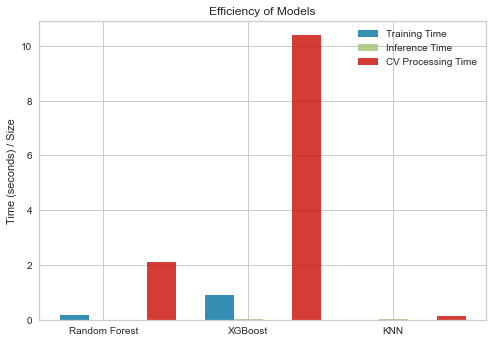

In [75]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'KNN']
training_times = [0.16, 0.9085, 0.0080]
inference_times = [0.01, 0.0120, 0.0130]
cv_processing_times = [2.11, 10.3960, 0.1219]

# Set the width of the bars
bar_width = 0.2

# Set the position of the x-axis ticks
r1 = np.arange(len(training_times))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r3]

# Create the figure
fig, ax = plt.subplots()

# Create the bar charts
rects1 = ax.bar(r1, training_times, bar_width, alpha=0.8, label='Training Time')
rects2 = ax.bar(r2, inference_times, bar_width, alpha=0.8, label='Inference Time')
rects3 = ax.bar(r4, cv_processing_times, bar_width, alpha=0.8, label='CV Processing Time')

# Add labels, title, and legend
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)
ax.set_ylabel('Time (seconds) / Size')
ax.set_title('Efficiency of Models')
ax.legend()

# Show the plot
plt.show()


In [76]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'KNN']
model_sizes = [2306922.00, 1326662.0000, 123695.0000]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, model_sizes, width=0.4)
ax.set_ylabel('Model Size')
ax.set_xlabel('Models')
ax.set_title('Model Sizes of the Three Models')
plt.show()


Choosing the best model would depend on the specific requirements of the application and the trade-offs between various factors such as training time, inference time, model size, and processing time. 

From the calculations, if training time is a critical factor, then Random Forest might be the best choice since it has the shortest training. On the other hand, if inference time is more important, then XGBoost could be the best option as it has the lowest inference time. But, if processing time is also a consideration, KNN might be the best choice, as it has the lowest CV processing time.

However, if the model size is also a concern, KNN might be the better choice since it has the smallest model size.

It's important to note that the best model will depend on the application's specific requirements and a trade-off between these factors. Therefore, it's essential to consider all the factors before selecting the best model for a particular problem.


### 2 Effectiveness 

I measured the effectiveness of a machine learning model in terms of its predictive accuracy and performance. The following metrics is used to assess the effectiveness of a model:

1.	Accuracy: The percentage of correct predictions made by the model. It measures the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made.


2.	Precision: measures how many of the “positive” predictions made by the model were correct.


3.	Recall: measures how many of the positive class samples present in the dataset were correctly identified by the model 


4.	F1 score: harmonic mean of precision and recall score and is used as a metrics in the scenarios where choosing either of precision or recall score can result in compromise in terms of model giving high false positives and false negatives respectively.




In [60]:
# Get the classification reports

print("Random Forest:\n", rf_report, "\nXGBoost:\n", xg_report, "\nKNN:\n", kn_report)

Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82        89
           1       0.63      0.60      0.61        99
           2       0.72      0.63      0.67       115
           3       0.90      0.83      0.86        95
           4       0.99      0.78      0.87       125
           5       0.47      0.67      0.55        61
           6       0.46      0.72      0.56        50

    accuracy                           0.72       634
   macro avg       0.71      0.72      0.71       634
weighted avg       0.76      0.72      0.73       634
 
XGBoost:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        90
           1       0.70      0.61      0.65       106
           2       0.73      0.71      0.72       104
           3       0.84      0.85      0.85        87
           4       0.97      0.91      0.94       104
           5       0.60      0.70      0.65        

Accuracy is a standard metric for evaluating the performance of a classification model. It represents the proportion of correctly classified instances out of the total number of instances. However, accuracy alone is not always the best metric for evaluating the performance of a model, especially when the classes are imbalanced. In such cases, other metrics such as precision, recall, and F1-score may be more appropriate.

If we look at the following classification reports, we can see that XGBoost has the highest overall accuracy score of 75%. In comparison, Random Forest has an accuracy of 72%, and KNN has an accuracy of 68%. But accuracy alone may not be enough to determine which model is better, as different models may perform differently for other classes.

If we look at precision and recall in different classes, it appears that XGBoost has the highest scores on classes 0, 3, and 4, which are the most accurately predicted classes by all three classifiers. On the other hand, the third classifier, KNN, has the lowest accuracy and F1-score and performs worst in classes 1 and 6.

If we look at the weighted scores, we can see that the second model (XGBoost) has the highest accuracy of 0.75, precision of 0.76 and recall of 0.75, followed by the first model (Random Forest) with an accuracy of 0.72, and the third model (K-Nearest Neighbors) has the lowest accuracy of 0.68. However, considering other metrics and factors, such as the problem domain and the specific use case, is important before deciding on the best model.


### 3 Stability 
The stability of a machine learning model refers to its consistency and robustness over time and across different datasets. In this case I used Cross-validation to assess the stability of a model. It is a technique for evaluating the performance of a model on multiple subsets of the data to check its consistency and generalization ability.

In [61]:
print("Cross Validation")
print("Random Forest    : CV-Mean", np.mean(rf_cv), "  Accuracy", accuracy_rf, "\n")
print("XGBoost          : CV-Mean", np.mean(xg_cv), "  Accuracy", accuracy_xg, "\n")
print("KNearestNeighbor : CV-Mea ", np.mean(kn_cv), "  Accuracy", accuracy_kn, "\n")

Cross Validation
Random Forest    : CV-Mean 0.753201287668783   Accuracy 0.7208201892744479 

XGBoost          : CV-Mean 0.7868393990879012   Accuracy 0.7539432176656151 

KNearestNeighbor : CV-Mea  0.6885456885456886   Accuracy 0.6798107255520505 



In [62]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'XGBoost', 'KNearestNeighbor']
cv_means = [0.753201287668783, 0.7868393990879012, 0.6885456885456886]
accuracies = [0.7208201892744479, 0.7539432176656151, 0.6798107255520505]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(models, cv_means, label='Cross-validation mean')
ax.bar(models, accuracies, label='Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models')
ax.legend()

plt.show()


I performed cross-validation for each of the three models, and the reported accuracy scores are the mean accuracy across all folds. The higher the accuracy score, the better the model performs on the dataset.

The CV-mean for Random Forest is 0.7532, which means that, on average, the model correctly classified 75.32% of the samples in the dataset. Therefore, the accuracy score reported for Random Forest is 0.7208, which is the accuracy score of the model on the test set.

Similarly, the CV-mean for XGBoost is 0.7868, which means that, on average, the model correctly classified 78.68% of the samples in the dataset. The accuracy score reported for XGBoost is 0.7539, which is the accuracy score of the model on the test set.

Finally, the CV-mean for KNearestNeighbor is 0.6885, which means that, on average, the model correctly classified 68.85% of the samples in the dataset. Furthermore, the accuracy score reported for KNearestNeighbor is 0.6798, which is the accuracy score of the model on the test set. These results show that XGBoost has the highest CV-mean and test accuracy score, indicating that it is the best model among the three for this dataset.


### Conclusion
Based on the classification report and the time reports, both Random Forest and XGBoost perform well in accuracy, precision, recall, F1 score, cross-validation, inference time, and model size. 

However, Random Forest has an advantage in terms of training time, while XGBoost has an advantage in terms of cv- processing time.

K-Nearest Neighbors (KNN) performed well in training time, CV processing time, and model size, but its performance was not reported in accuracy, precision, recall, and F1 score.

Overall, Random Forest and XGBoost seem to be good choices for classification problems, depending on the project's specific needs.

The important features calculated in XG Boost are family history, consumption of food between meals (CAEC_n), transportation used (MTRANS), consumption of alcohol (CALC_n), number of main meals (NCP), and age that influence obesity.

